In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url,parse_dates=['Month'],index_col='Month') # by using parse_dates we can automatically convert it into datetime format
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
# instead of this we can directly do them in pd in above cell
# then we can get more simpler graph 
# to make month as index

#df.index = df['Month']

# to remove month column

#df.drop('Month',axis=1,inplace=True)

In [4]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


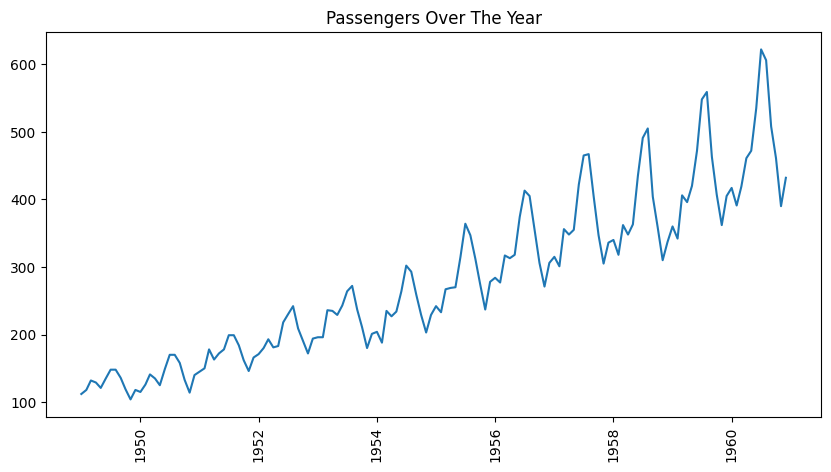

In [5]:
# to plot it

plt.figure(figsize=(10,5))
plt.plot(df,label='Passengers')
plt.title('Passengers Over The Year')
plt.xticks(rotation=90)
plt.show()

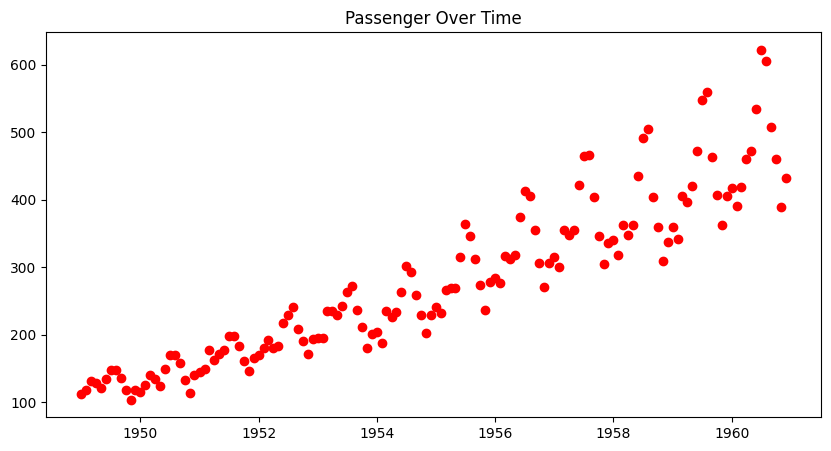

In [6]:
# to create a scatterplot

plt.figure(figsize=(10,5))
plt.scatter(df.index,df['Passengers'],c='red')
plt.title('Passenger Over Time')
plt.show()

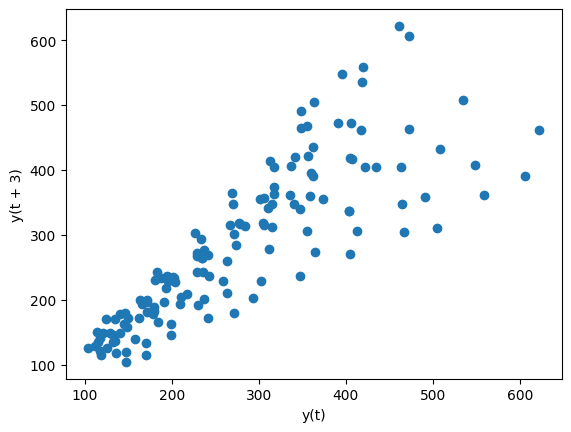

In [7]:
# to create lag plot for 3 months

from pandas.plotting import lag_plot
lag_plot(df['Passengers'],lag=3)
plt.show()

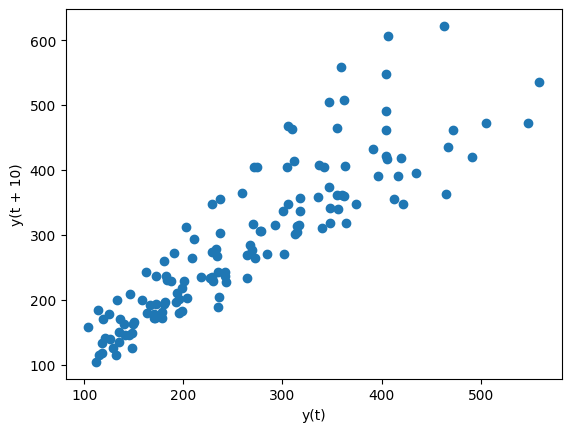

In [8]:
# to create lag plot for 10 months

from pandas.plotting import lag_plot
lag_plot(df['Passengers'],lag=10)
plt.show()

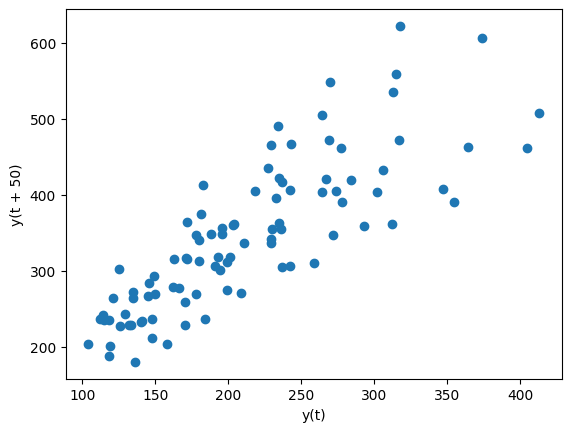

In [9]:
# to create lag plot for 50 months

from pandas.plotting import lag_plot
lag_plot(df['Passengers'],lag=50)
plt.show()

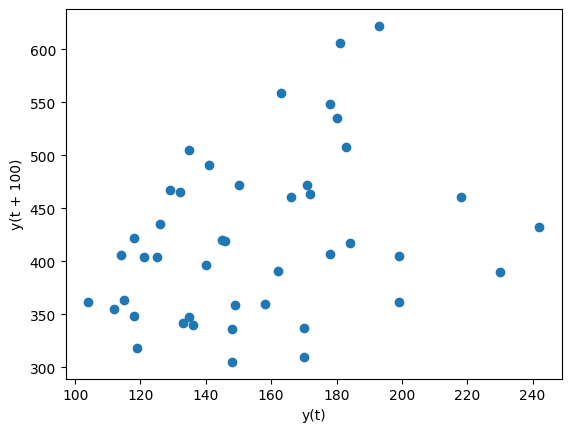

In [10]:
# to create lag plot for 100 months

from pandas.plotting import lag_plot
lag_plot(df['Passengers'],lag=100)
plt.show()

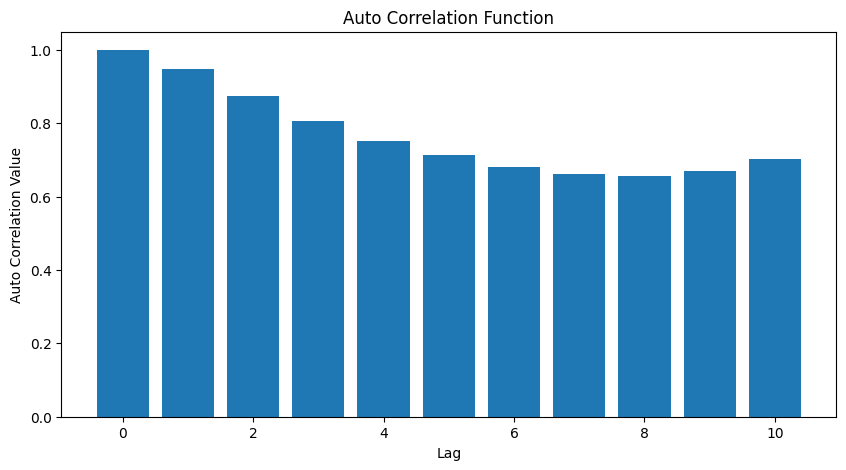

In [11]:
# Auto Correlation for 10 months

from statsmodels.tsa.stattools import acf

acf_values = acf(df['Passengers'],nlags=10)
acf_values

# to plot it

plt.figure(figsize=(10,5))
plt.bar(range(len(acf_values)),acf_values)
plt.title('Auto Correlation Function')
plt.xlabel('Lag')
plt.ylabel('Auto Correlation Value')
plt.show()

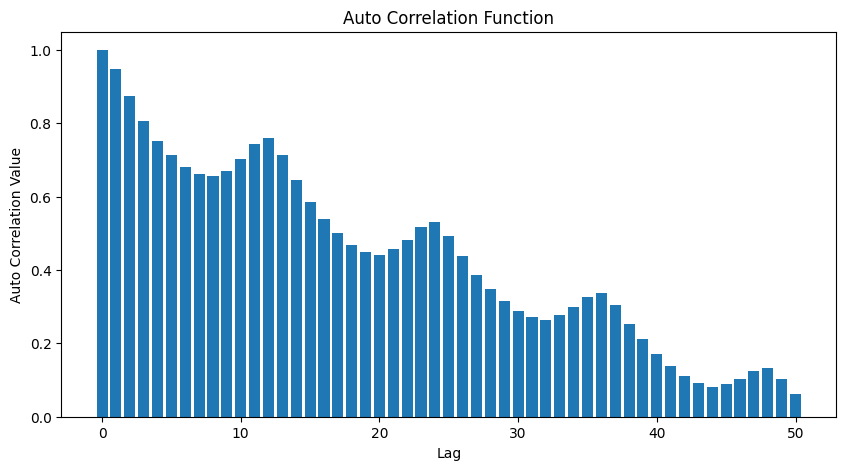

In [12]:
# Auto Correlation for 50 months

from statsmodels.tsa.stattools import acf

acf_values = acf(df['Passengers'],nlags=50)
acf_values

# to plot it

plt.figure(figsize=(10,5))
plt.bar(range(len(acf_values)),acf_values)
plt.title('Auto Correlation Function')
plt.xlabel('Lag')
plt.ylabel('Auto Correlation Value')
plt.show()

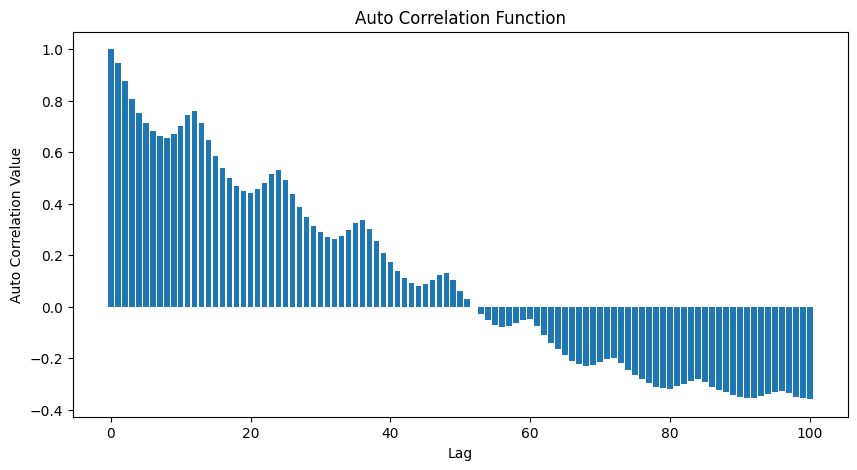

In [13]:
# Auto Correlation for 100 months

from statsmodels.tsa.stattools import acf

acf_values = acf(df['Passengers'],nlags=100)
acf_values

# to plot it

plt.figure(figsize=(10,5))
plt.bar(range(len(acf_values)),acf_values)
plt.title('Auto Correlation Function')
plt.xlabel('Lag')
plt.ylabel('Auto Correlation Value')
plt.show()

In [14]:
# to split the train data and test data

train = df[:-12] # except last year
test = df[-12:] # only the last year

In [15]:
train

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [16]:
test

,Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [17]:
# Navie Forecast

navie_pred = [train['Passengers'].iloc[-1]]*len(test)

# RMSE
from sklearn.metrics import root_mean_squared_error
print(f'RMSE : {root_mean_squared_error(test,navie_pred)}')

RMSE : 102.97653454387881


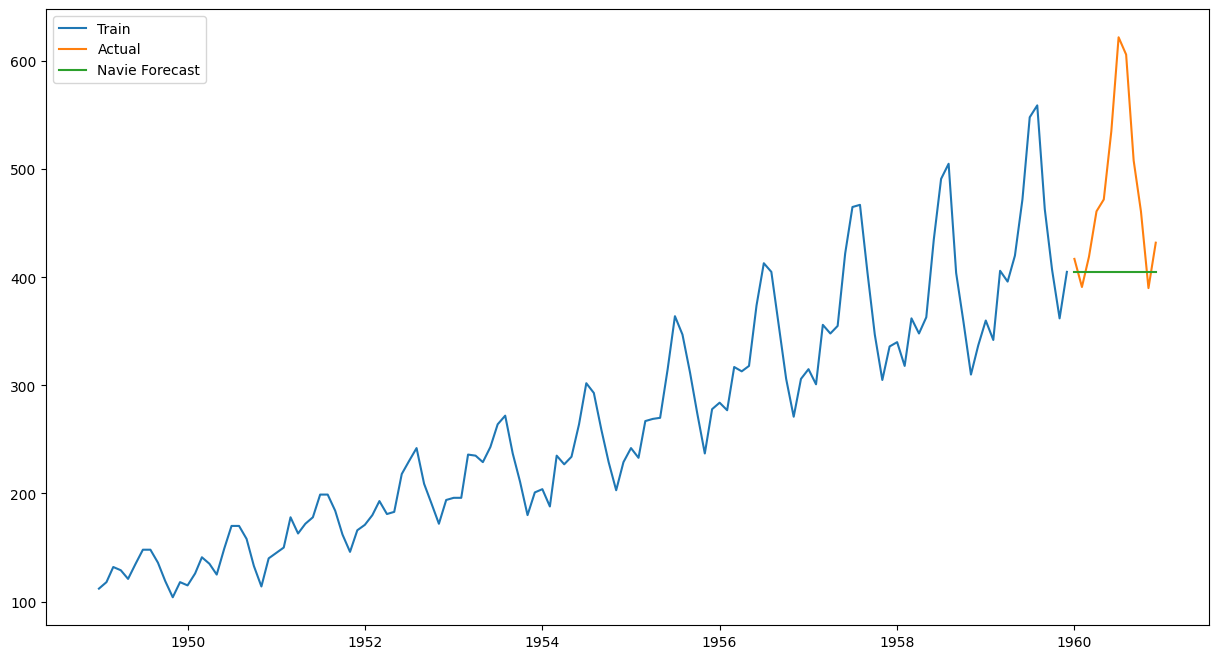

In [18]:
# to plot it

plt.figure(figsize=(15,8))
plt.plot(train,label="Train")
plt.plot(test,label="Actual")
plt.plot(test.index,navie_pred,label="Navie Forecast")
plt.legend()
plt.show()

In [19]:
# to reduce the error by using Rolling mean or moving average (3 month)

moving_average = [df['Passengers'].rolling(window=3).mean().iloc[-1]]*len(test)
print(f'RMSE : {root_mean_squared_error(test,moving_average)}')

RMSE : 88.83536583040687


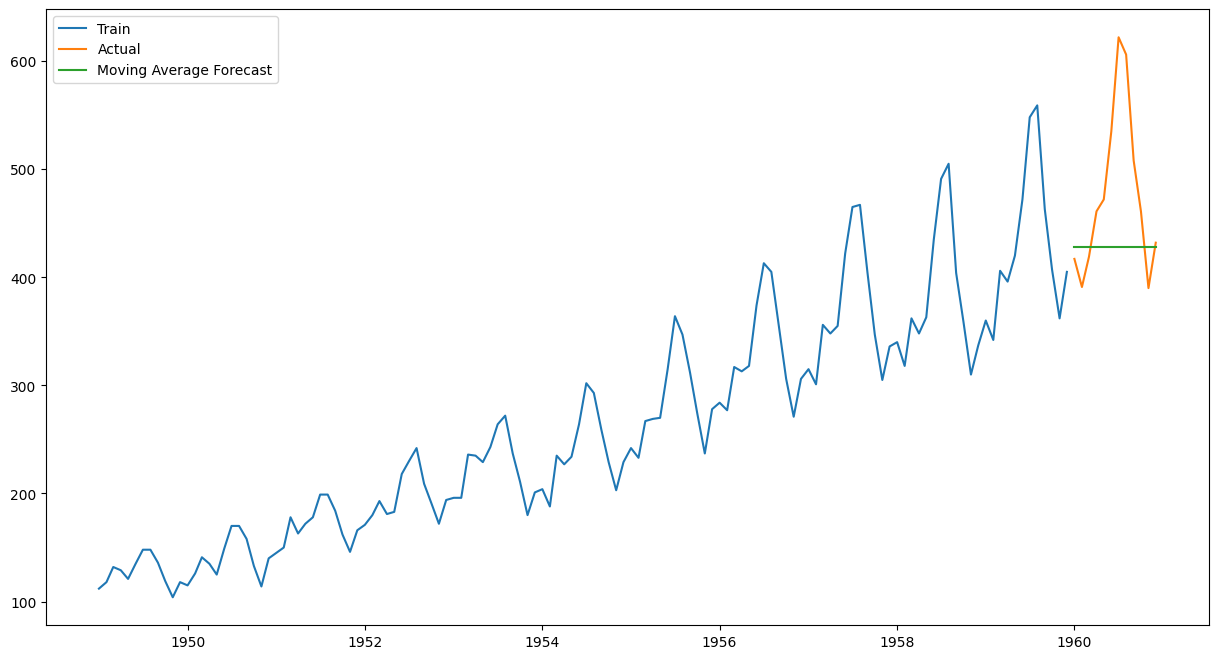

In [20]:
# to plot it

plt.figure(figsize=(15,8))
plt.plot(train,label="Train")
plt.plot(test,label="Actual")
plt.plot(test.index,moving_average,label="Moving Average Forecast")
plt.legend()
plt.show()

In [21]:
# to reduce the error by using Rolling mean or moving average (12 month)

moving_average = [df['Passengers'].rolling(window=12).mean().iloc[-1]]*len(test)
print(f'RMSE : {root_mean_squared_error(test,moving_average)}')

RMSE : 74.42763077125473


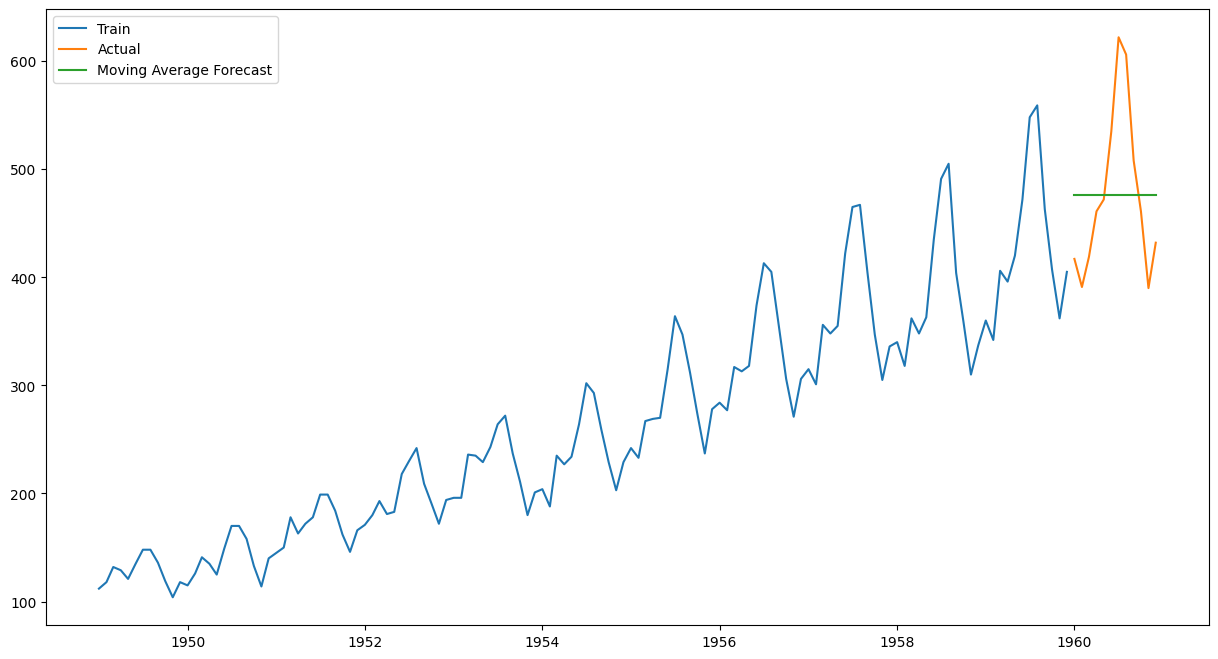

In [22]:
# to plot it

plt.figure(figsize=(15,8))
plt.plot(train,label="Train")
plt.plot(test,label="Actual")
plt.plot(test.index,moving_average,label="Moving Average Forecast")
plt.legend()
plt.show()

In [23]:
# Auto Regressive model for 3 month

from statsmodels.tsa.ar_model import AutoReg
warnings.filterwarnings('ignore')

amodel = AutoReg(train['Passengers'],lags=3).fit()
amodel_pred=amodel.predict(start=test.index[0],end=test.index[-1])

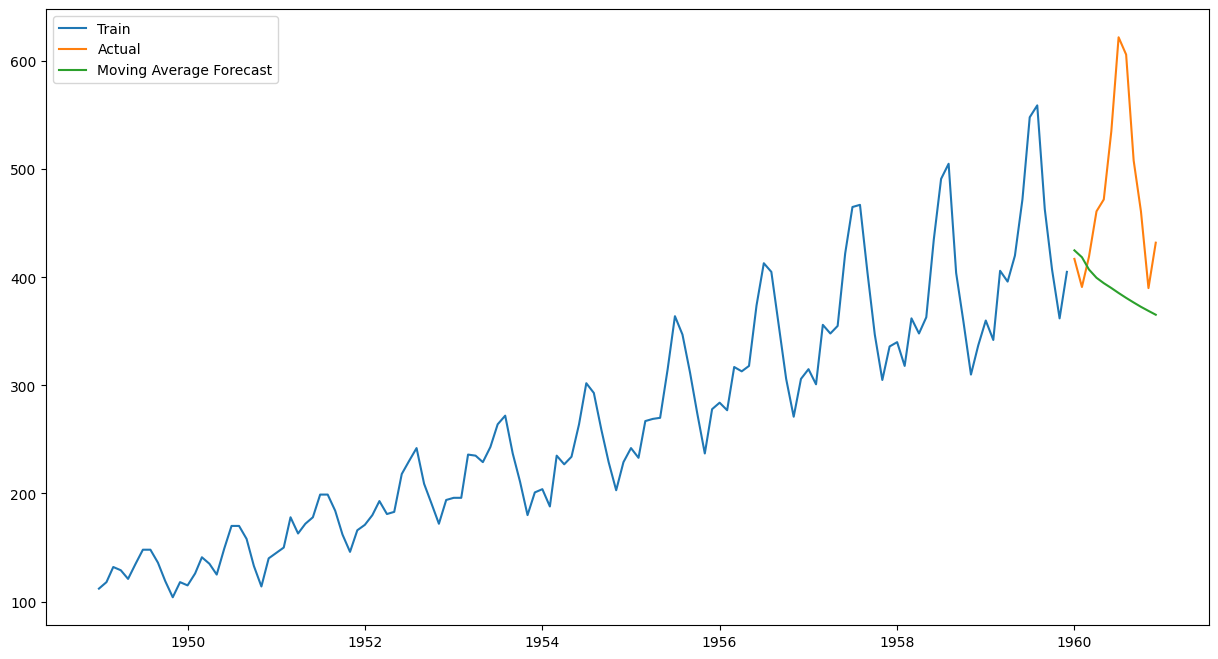

In [24]:
# to plot it

plt.figure(figsize=(15,8))
plt.plot(train,label="Train")
plt.plot(test,label="Actual")
plt.plot(test.index,amodel_pred,label="Moving Average Forecast")
plt.legend()
plt.show()

In [25]:
# Auto Regressive model for 10 month

from statsmodels.tsa.ar_model import AutoReg
warnings.filterwarnings('ignore')

amodel = AutoReg(train['Passengers'],lags=10).fit()
amodel_pred=amodel.predict(start=test.index[0],end=test.index[-1])

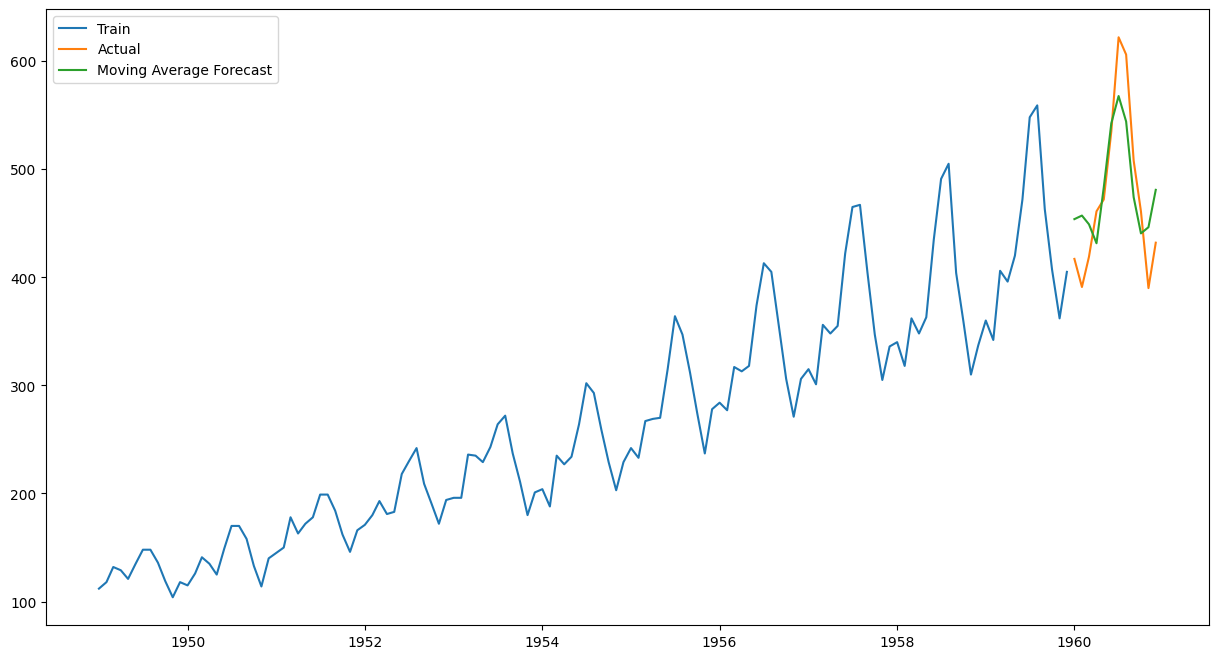

In [26]:
# to plot it

plt.figure(figsize=(15,8))
plt.plot(train,label="Train")
plt.plot(test,label="Actual")
plt.plot(test.index,amodel_pred,label="Moving Average Forecast")
plt.legend()
plt.show()

In [27]:
# Auto Regressive model for 12 month

from statsmodels.tsa.ar_model import AutoReg
warnings.filterwarnings('ignore')

amodel = AutoReg(train['Passengers'],lags=12).fit()
amodel_pred=amodel.predict(start=test.index[0],end=test.index[-1])

print('RMSE :',root_mean_squared_error(test,amodel_pred))

RMSE : 17.487527630934352


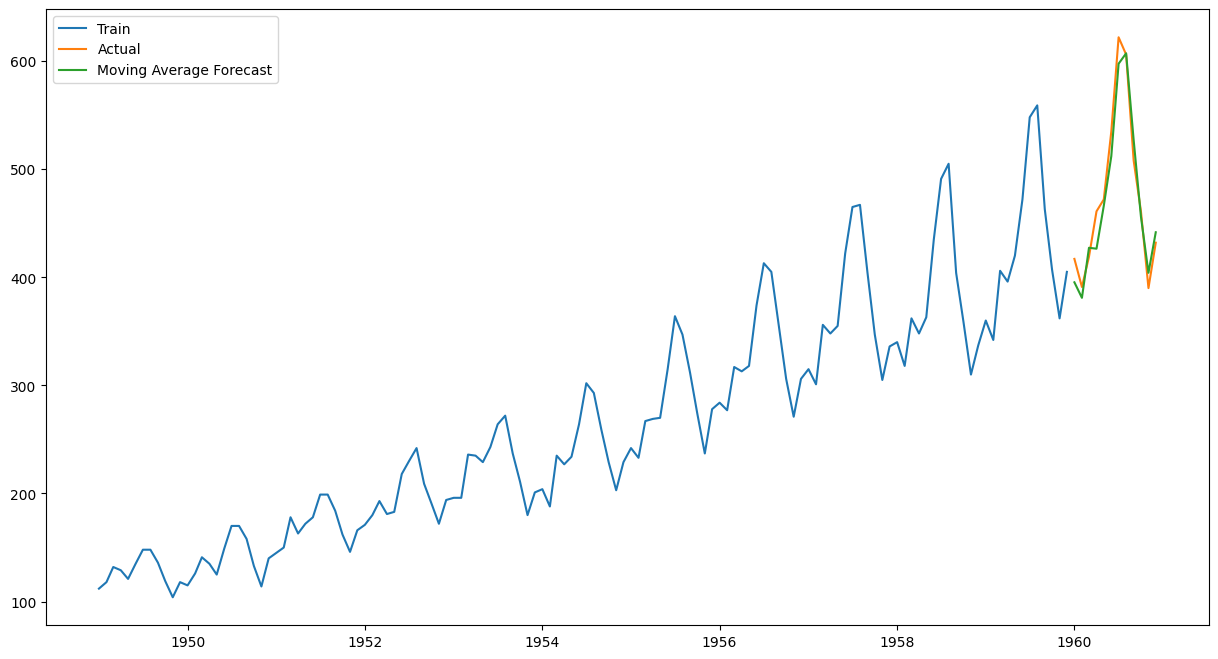

In [28]:
# to plot it

plt.figure(figsize=(15,8))
plt.plot(train,label="Train")
plt.plot(test,label="Actual")
plt.plot(test.index,amodel_pred,label="Moving Average Forecast")
plt.legend()
plt.show()

In [29]:
# Auto Regressive model for 24 month

from statsmodels.tsa.ar_model import AutoReg
warnings.filterwarnings('ignore')

amodel = AutoReg(train['Passengers'],lags=24).fit()
amodel_pred=amodel.predict(start=test.index[0],end=test.index[-1])

print('RMSE :',root_mean_squared_error(test,amodel_pred))

RMSE : 14.036601009946752


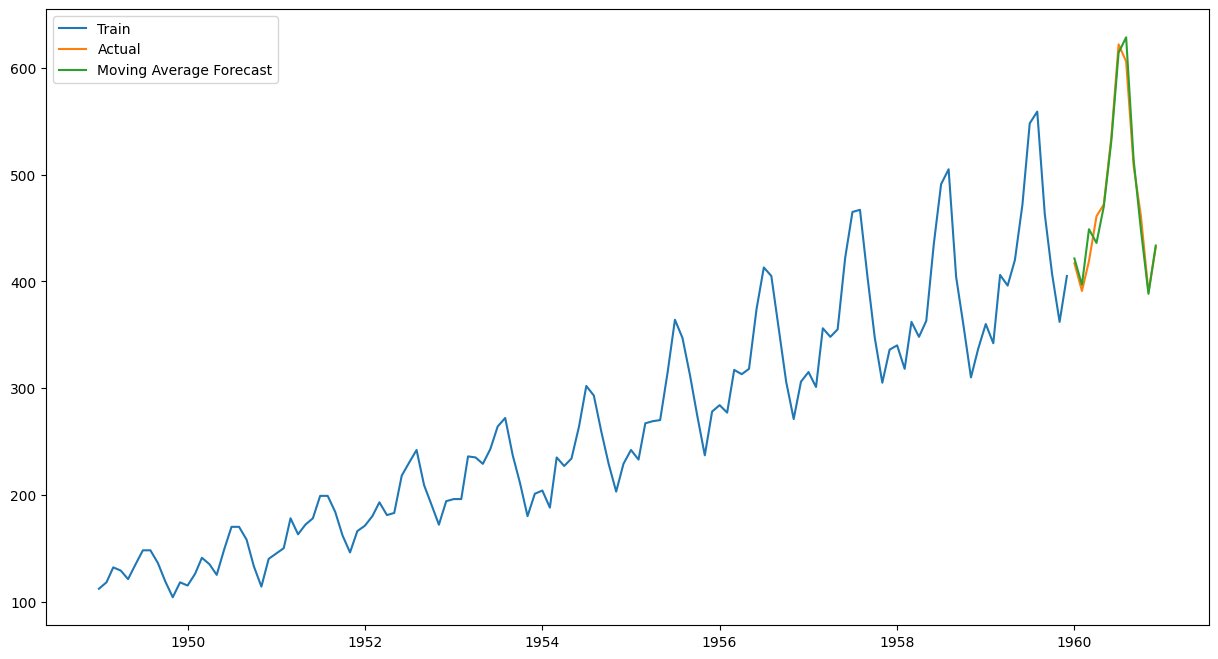

In [30]:
# to plot it

plt.figure(figsize=(15,8))
plt.plot(train,label="Train")
plt.plot(test,label="Actual")
plt.plot(test.index,amodel_pred,label="Moving Average Forecast")
plt.legend()
plt.show()

In [31]:
# to predict future customer numbers based on the trend

# it contain only from 1961

time  = pd.date_range(start=test.index[0]+pd.DateOffset(years=1),periods=120,freq='M')
time

DatetimeIndex(['1961-01-31', '1961-02-28', '1961-03-31', '1961-04-30',
               '1961-05-31', '1961-06-30', '1961-07-31', '1961-08-31',
               '1961-09-30', '1961-10-31',
               ...
               '1970-03-31', '1970-04-30', '1970-05-31', '1970-06-30',
               '1970-07-31', '1970-08-31', '1970-09-30', '1970-10-31',
               '1970-11-30', '1970-12-31'],
              dtype='datetime64[ns]', length=120, freq='ME')

In [32]:
# to get date from 1960 to 70

time = test.index.append(time)
time

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '1970-03-31', '1970-04-30', '1970-05-31', '1970-06-30',
               '1970-07-31', '1970-08-31', '1970-09-30', '1970-10-31',
               '1970-11-30', '1970-12-31'],
              dtype='datetime64[ns]', length=132, freq=None)

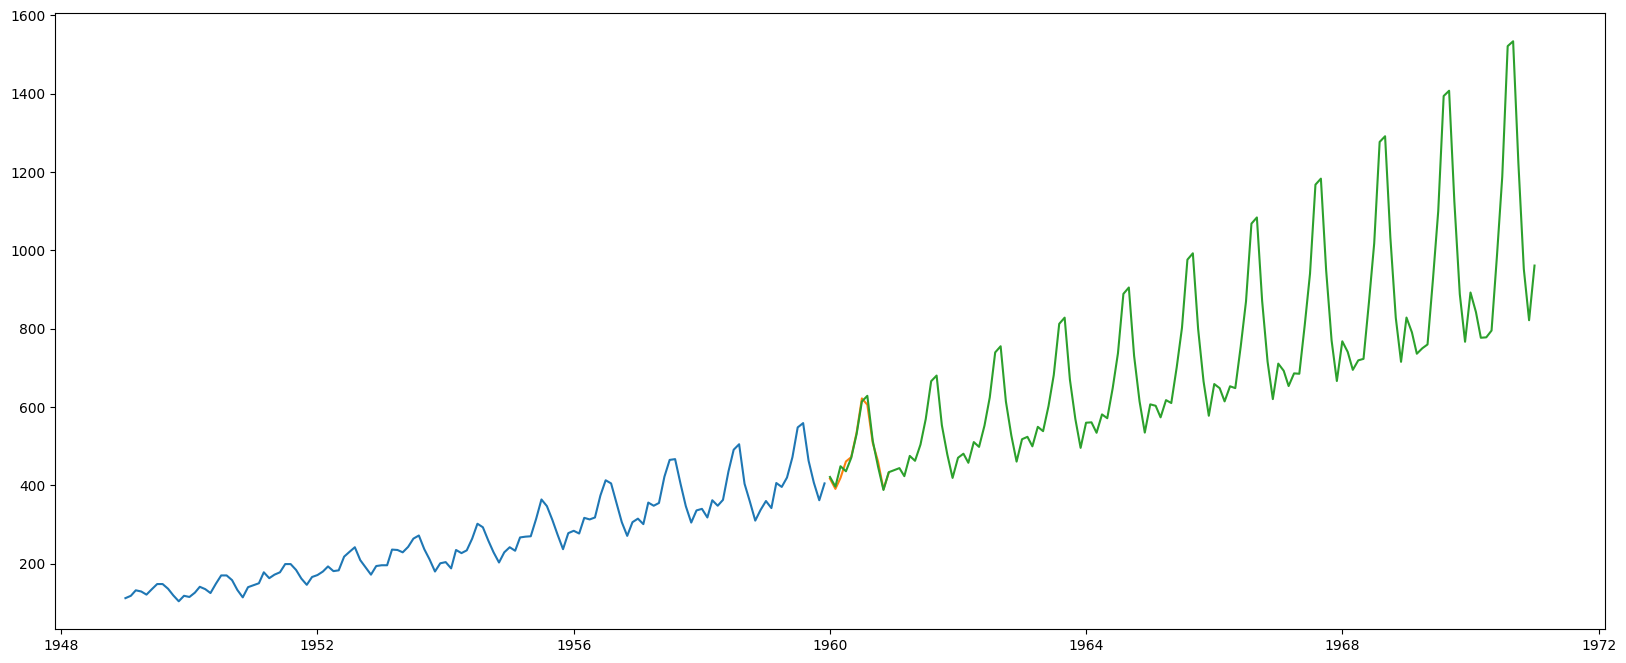

In [33]:
amodel_pred = amodel.predict(start=test.index[0],end=test.index[-1]+pd.DateOffset(years=10))

plt.figure(figsize=(20,8))
plt.plot(train,label='Train')
plt.plot(test,label='Actual')
plt.plot(time,amodel_pred,label='Auto Regressive Forecast')
plt.show()

In [34]:
# simple exponential smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
warnings.filterwarnings('ignore')

exp_model = SimpleExpSmoothing(train['Passengers']).fit()
exp_forecast = exp_model.forecast(len(test))

print('RMSE :',root_mean_squared_error(test,exp_forecast))

RMSE : 102.9765349866985


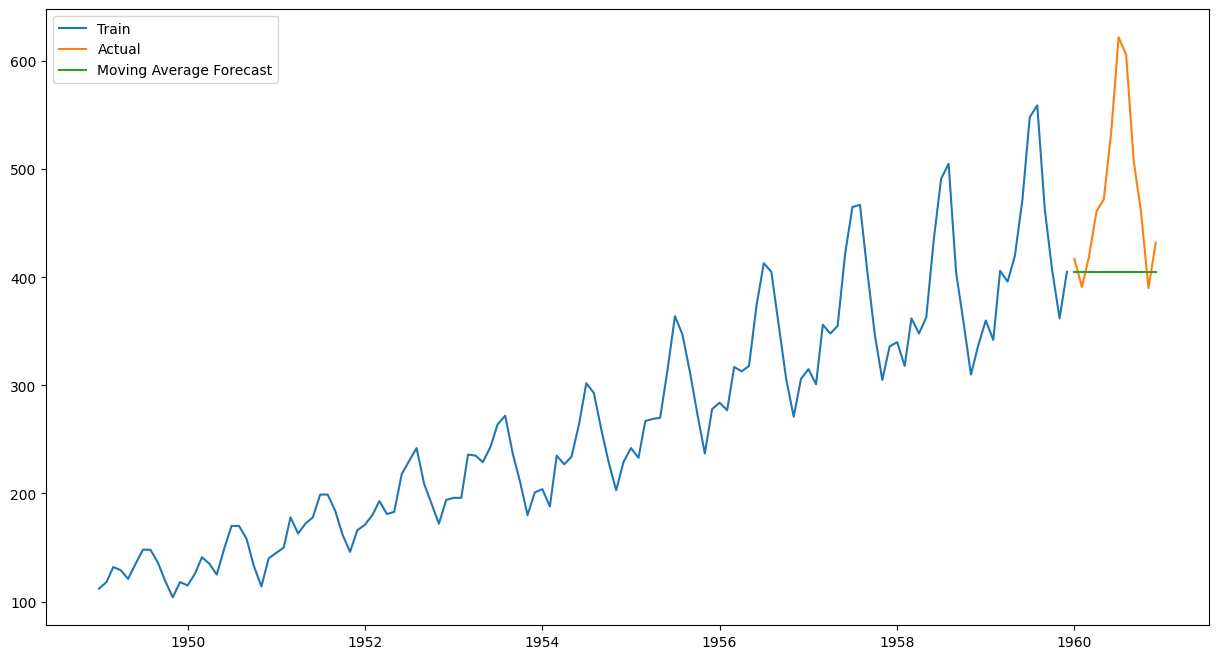

In [35]:
# to plot it

plt.figure(figsize=(15,8))
plt.plot(train,label="Train")
plt.plot(test,label="Actual")
plt.plot(test.index,exp_forecast,label="Moving Average Forecast")
plt.legend()
plt.show()

In [36]:
# ARIMA 

# AutoRegressive Models ==> (p)
# Moving Average ==> (q)
# Mixed AutoRegressive Moving Average Models --> ARMA ==> (p,q)
# AutoRegressive Integrated Moving Average Models (Integration Models) --> ARIMA ==> (p,d,q)
# Seasonal models --> SARIMA ==> (p,d,q,s)

In [37]:
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')
arima_model = ARIMA(train['Passengers'],order=(2,1,1)).fit()
print(arima_model.aic) # when aic score is less , then it capture more variance

1246.2622466898104


In [38]:
# to find the best order

import itertools
warnings.filterwarnings('ignore')
p = range(0,4)
d = range(0,4)
q = range(0,4)

best_aic = float('inf')
best_order = None

for i in itertools.product(p,d,q):
    try:
        arima_model = ARIMA(train['Passengers'],order=i).fit()
        if arima_model.aic < best_aic:
            best_aic = arima_model.aic
            print(i,best_aic)
            best_order = i
    except:
        continue

(0, 0, 0) 1610.2979609062063
(0, 0, 1) 1453.4999823634803
(0, 0, 2) 1372.2309491957558
(0, 0, 3) 1302.8461869133696
(0, 1, 0) 1276.2586362128227
(0, 1, 1) 1263.1950611787026
(0, 1, 2) 1261.627119635048
(0, 1, 3) 1260.720711925215
(0, 2, 2) 1260.3701230373395
(0, 2, 3) 1259.0506961862156
(1, 1, 1) 1257.0352712018912
(1, 1, 2) 1252.973559796416
(2, 1, 1) 1246.2622466898104
(2, 1, 2) 1225.5631233095583
(3, 1, 3) 1214.9100602856486


In [39]:
print(best_aic)

1214.9100602856486


In [40]:
print(best_order)

(3, 1, 3)


In [41]:
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')
arima_model = ARIMA(train['Passengers'],order=(3,1,3)).fit()
arima_pred = arima_model.forecast(steps=12)

RMSE : 58.309613336566755


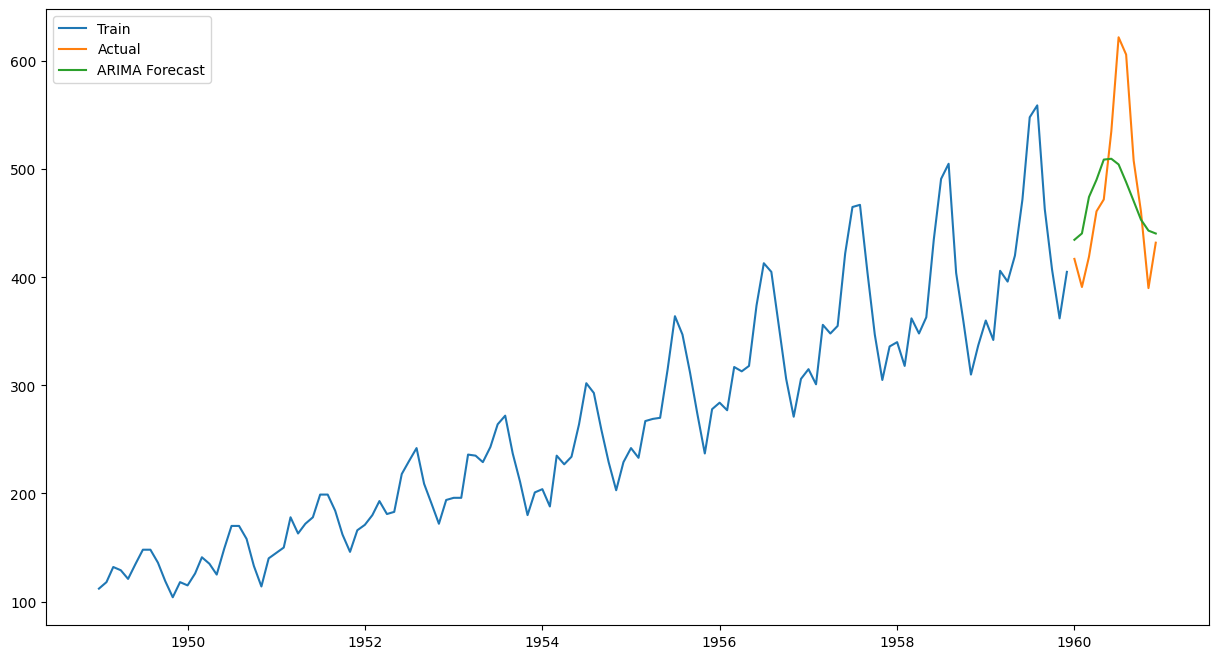

In [42]:
# to plot it
print("RMSE :",root_mean_squared_error(test,arima_pred)) 

plt.figure(figsize=(15,8))
plt.plot(train,label="Train")
plt.plot(test,label="Actual")
plt.plot(test.index,arima_pred,label="ARIMA Forecast")
plt.legend()
plt.show()

RMSE : 26.95232592532786


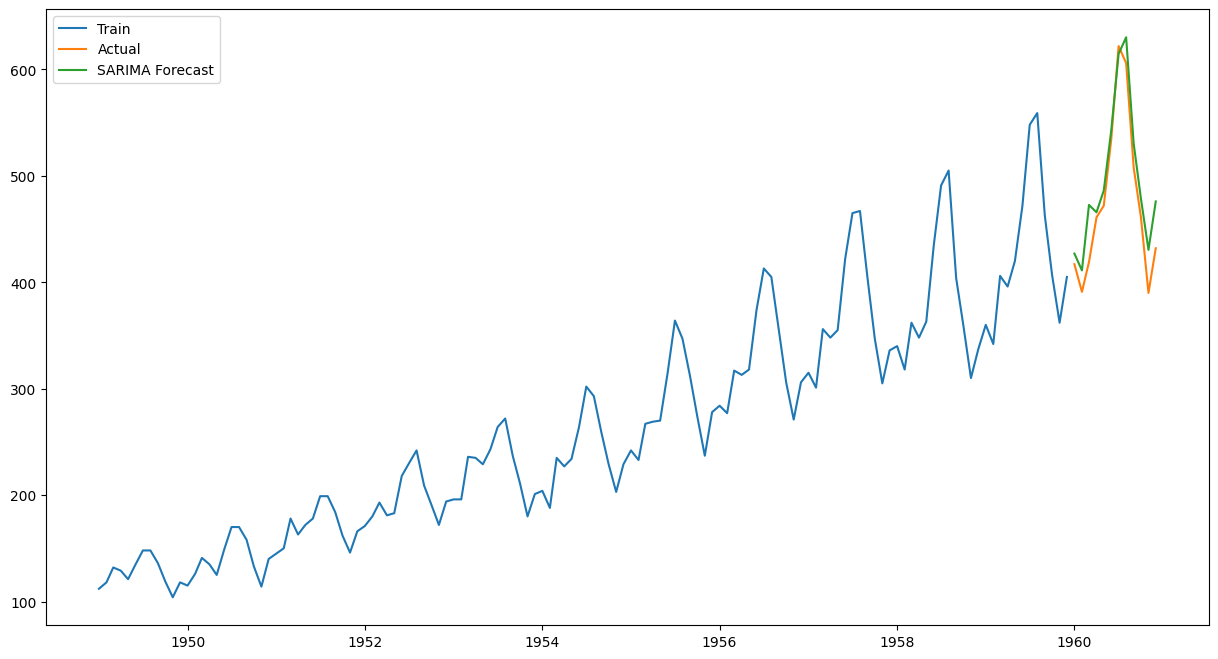

In [43]:
# SARIMA model for 6 months

from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

sa_model = SARIMAX(train['Passengers'],order=best_order,seasonal_order=(3,1,3,6)).fit()
sa_pred = sa_model.forecast(steps=12)

# to plot it
print("RMSE :",root_mean_squared_error(test,sa_pred)) 

plt.figure(figsize=(15,8))
plt.plot(train,label="Train")
plt.plot(test,label="Actual")
plt.plot(test.index,sa_pred,label="SARIMA Forecast")
plt.legend()
plt.show()

RMSE : 15.034262307815524


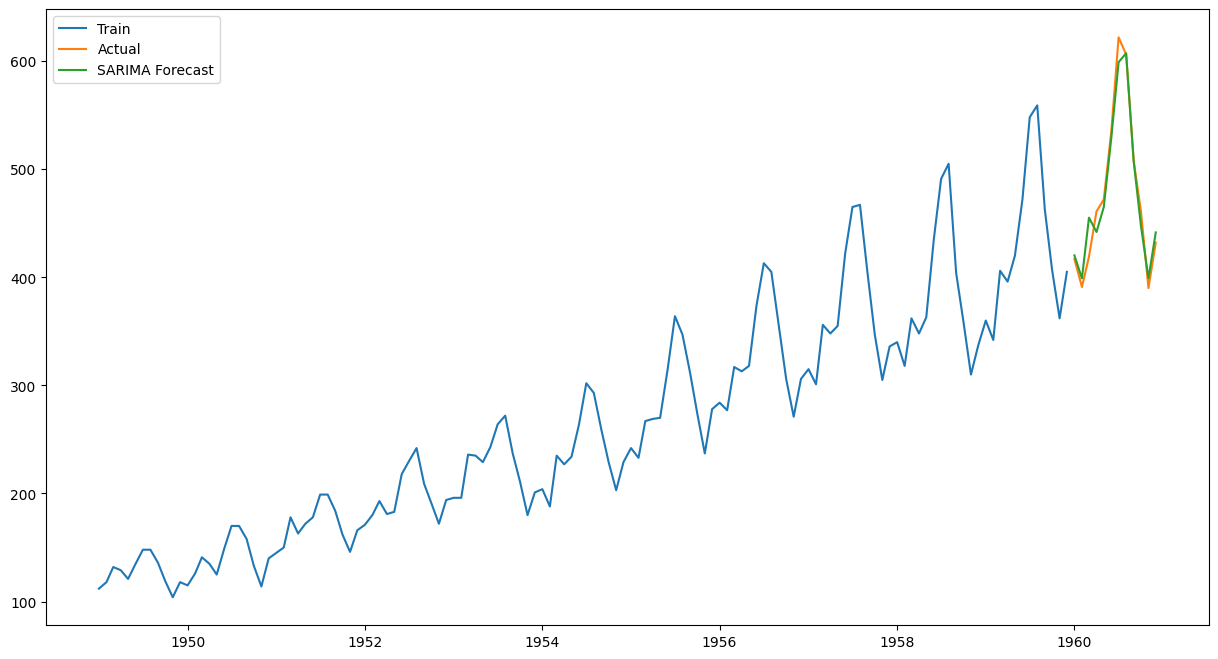

In [44]:
# SARIMA model for 12 months

from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

sa_model = SARIMAX(train['Passengers'],order=best_order,seasonal_order=(3,1,3,12)).fit()
sa_pred = sa_model.forecast(steps=12)

# to plot it
print("RMSE :",root_mean_squared_error(test,sa_pred)) 

plt.figure(figsize=(15,8))
plt.plot(train,label="Train")
plt.plot(test,label="Actual")
plt.plot(test.index,sa_pred,label="SARIMA Forecast")
plt.legend()
plt.show()